# 案例補充：取得 Wep API 資料 (json)，讀入 pandas 建立 dataframe
- 資料來源: [Cafe Nomad：咖啡廳遊牧民族](https://cafenomad.tw/)
  - Web API: [API v1.2](https://cafenomad.tw/developers/docs/v1.2)
- Pandas 官方文件: [https://pandas.pydata.org/docs/reference/index.html](https://pandas.pydata.org/docs/reference/index.html)
  - cheatsheet: [with pandas Cheat Sheet http://pandas.pydata.org](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [ ]:
'''安裝 requests 套件: 對網頁伺服器發出請求與取得回應的工具'''
!pip install requests pandas matplotlib

In [1]:
# 匯入套件
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 讓 matplotlic 支援中文字型
matplotlib.rc('font', family='Microsoft JhengHei')

In [ ]:
'''
取得 json 資料

臺北咖啡廳資訊 Web API:
https://cafenomad.tw/api/v1.2/cafes/taipei
'''
# 發出請求，取得回應
response = requests.get(url="https://cafenomad.tw/api/v1.2/cafes/taipei")

# 將回應內容以 json 格式 (將 json 字串轉成 dict 或 list) 回傳
data = response.json()

'''
如果是取得 csv 格式的資料，可以改成:
data = response.text
'''
data

In [3]:
'''建立 dataframe'''
df = pd.DataFrame(data)
df

,id,name,city,wifi,seat,quiet,tasty,cheap,music,url,address,latitude,longitude,limited_time,socket,standing_desk,mrt,open_time
0,000703fe-cf8a-43c8-bd83-c90cfd61915f,蜂巢咖啡,taipei,0.0,4.5,3.0,5.0,4.0,4.0,https://www.facebook.com/honeycombcafe2016/,新北市永和區永貞路214號,25.00409680,121.51528650,no,no,yes,永安市場站,雙週四公休，有變更另外公告
1,0022fc3b-598f-4bb5-bb69-1b7d1b9b5202,(暫停營業) The Kaffa Lovers,taipei,5.0,5.0,5.0,5.0,4.0,5.0,https://www.facebook.com/thekaffalovers/?fref=ts,台北市中正區金山北路3號,25.04435400,121.53045590,no,maybe,yes,忠孝新生,週二至週五 10:00-19:00 六日09:00-19:00
2,005a5ee9-7460-4f8a-b965-8b9565ee1e4e,一杯咖啡士林店,taipei,0.0,0.0,0.0,0.0,0.0,0.0,https://www.facebook.com/acupofcoffeeshilin/,台北市士林區中山北路五段505巷36號,25.09302050,121.52667780,no,yes,yes,,
3,00971781-cad6-4a6f-8a38-b597d8a1488b,Full of Beans 充滿豆豆咖啡館,taipei,0.0,0.0,0.0,0.0,0.0,0.0,https://www.facebook.com/FOBcafe.gallery/,台北市中山區龍江路21巷9-6號,25.04783800,121.54113810,,,,,
4,00b6ce2b-d92e-44e5-b1cb-daaa925a5135,良食究好市集餐廳WONMI,taipei,5.0,3.0,3.0,5.0,0.0,5.0,http://www.wonmi.com.tw/home.php,台北市八德路四段138號 (京華城 Living Mall 10 F),25.04835450,121.56230040,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,ff53abc4-7a89-43db-8d0b-43e5b00dff5f,喜穗咖啡蘭花生活館（永久停業）,taipei,0.0,0.0,0.0,0.0,0.0,0.0,,242新北市新莊區中原東路206號,25.05447010,121.46051500,,maybe,no,,
1661,ff582eb9-3f83-4f65-98b2-c38a4ef511db,自然產,taipei,3.0,5.0,4.0,4.0,3.0,3.0,https://www.facebook.com/greenday209/,新北市板橋區重慶路209號,25.00157470,121.46294660,maybe,yes,no,,
1662,ff973c43-9474-46dc-bb24-0d1947143ba1,金獅取水,taipei,0.0,0.0,0.0,0.0,0.0,0.0,https://www.facebook.com/goldenlionkafe,台北市中山區民生東路2段151號,25.05815610,121.53540250,maybe,yes,yes,,
1663,ffd780fe-9d33-4a4b-90dd-74d7d9de31f7,The Tuckaway Taipei,taipei,5.0,5.0,5.0,5.0,5.0,4.0,IG FB tuckawaytaipei,台北市文山區木柵路三段48巷1弄6號1樓,24.98797900,121.56523300,no,maybe,no,,


In [4]:
'''dataframe 的詳細資料'''
df_detail = df.describe()
df_detail


# 問題: 下面兩行程式碼差異?
# df_detail.loc['25%', ['wifi']] => 回傳 Series，可以使用 .index 和 .values
# df_detail.loc['25%', 'wifi']  => 類似 df.at()，取得特定 cell 的值

,wifi,seat,quiet,tasty,cheap,music
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,2.845105,2.983483,2.795375,3.087087,2.751652,2.972072
std,2.276260,2.031053,1.935355,2.087174,1.906082,2.051317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,3.500000,4.000000,3.500000,4.000000
75%,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
'''了解指定 column 每個值的數量'''
df.value_counts('limited_time')

limited_time
no       712
         639
maybe    281
yes       33
Name: count, dtype: int64

In [6]:
'''它的型別'''
type(df.value_counts('limited_time'))

pandas.core.series.Series

In [7]:
'''取得 series 的 index'''
df.value_counts('limited_time').index

Index(['no', '', 'maybe', 'yes'], dtype='object', name='limited_time')

In [8]:
'''
將上面的空字元，改成其它文字

df.loc[row:column]
row 的地方，也可以改成條件判斷
'''
df.loc[df['limited_time'] == '', 'limited_time'] = 'undefined'

# 註: socket 也有空字元，視情況處理
# df.loc[df['socket'] == '', 'socket'] = 'undefined'

In [9]:
'''再檢視'''
df.value_counts('limited_time').index

Index(['no', 'undefined', 'maybe', 'yes'], dtype='object', name='limited_time')

In [10]:
'''取得 series 的 values'''
df.value_counts('limited_time').values

array([712, 639, 281,  33], dtype=int64)

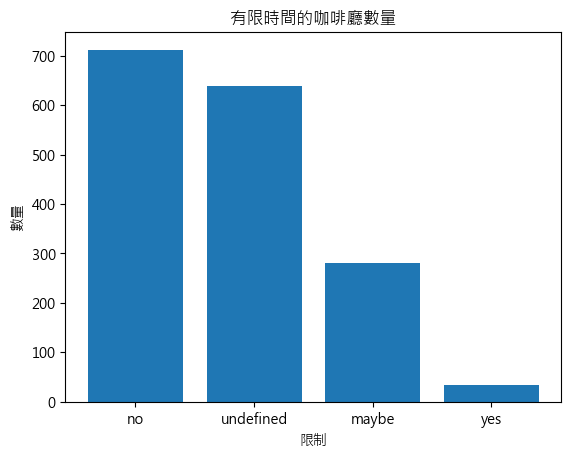

In [11]:
'''
畫個圖吧


參考連結:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
'''
plt.bar(
    df.value_counts('limited_time').index, 
    df.value_counts('limited_time').values
)
plt.title("有限時間的咖啡廳數量")
plt.xlabel("限制")
plt.ylabel("數量")
plt.show()

---
# 字串搜尋與條件判斷

In [12]:
'''取得 臺北市信義區 的資料'''
df[ df['address'].str.contains("臺北市大安區", case=False) ]

,id,name,city,wifi,seat,quiet,tasty,cheap,music,url,address,latitude,longitude,limited_time,socket,standing_desk,mrt,open_time
312,2e98e587-7ea8-4544-8137-a00798c4027c,C25度咖啡館,taipei,0.0,0.0,4.0,0.0,3.0,5.0,https://www.facebook.com/c25cafe/,臺北市大安區安和路一段21巷23號1F,25.03950190,121.55152820,no,maybe,,,
831,7d902454-c657-443b-8c01-6b73021b76ff,BeansLab coffee 豆研咖啡館,taipei,5.0,5.0,5.0,5.0,5.0,5.0,http://www.facebook.com/beanslabcoffee,臺北市大安區辛亥路二段171巷6弄6號,25.02190620,121.54085540,undefined,maybe,yes,科技大樓捷運站,
1067,a36d3002-1ead-40ee-9747-70b760ae9dc3,學校咖啡館EcoleCafe',taipei,4.0,3.0,3.0,4.0,3.0,4.0,https://www.facebook.com/ecolecafe.cafetrouve/,臺北市大安區青田街1巷6號,25.02891190,121.53217200,no,yes,yes,"東門站5號出口步8分/公車站''金華國中""步2分, ""金華新生路口""""溫州街口""步5分/Yo...",
1340,d0173b58-c0ae-4210-8c0f-6971c1010fb7,Louisa Coffee 路易莎咖啡(師大直營店),taipei,4.5,3.0,2.0,4.0,5.0,4.0,,臺北市大安區和平東路一段79號,25.02705990,121.52531890,undefined,maybe,no,,


In [13]:
'''取得在「臺北市」，且「插座很多」、「不限時間」、「便宜程度 4 以上」的資料'''
df[ 
    df['address'].str.contains('台北市') & 
    (df['socket'] == 'yes') & 
    (df['limited_time'] == 'no') &
    (df['cheap'] >= 4)
]

,id,name,city,wifi,seat,quiet,tasty,cheap,music,url,address,latitude,longitude,limited_time,socket,standing_desk,mrt,open_time
27,02ab54d1-2792-41bb-a532-cdeb36cc2233,Pure Caf'e,taipei,5.0,5.0,5.0,5.0,5.0,5.0,https://www.facebook.com/purecaf,台北市中山區北安路595巷19弄2號,25.08242060,121.54757010,no,yes,no,大直捷運站,
46,05dd1faa-3c45-4595-86ca-a255291c37f4,The Misanthrope Society 厭世會社,taipei,5.0,5.0,5.0,5.0,5.0,5.0,http://facebook.com/mis.society,台北市中正區羅斯福路四段40巷1-2號一樓,25.01511800,121.53328700,no,yes,yes,公館站,
48,06c2c234-719e-44a2-b4b7-6029e52bdaf7,未央咖啡店,taipei,5.0,4.0,4.0,5.0,4.0,5.0,https://www.facebook.com/BCmidnightcafe/,台北市大安區四維路208巷10號,25.02625800,121.54741500,no,yes,no,"科技大樓站步7分/公車站""鳳雛公園""步1分, ""臥龍街""步3分/YouBike""成功國宅""站步1分",
61,085927d6-6035-4653-80d7-a936eecbe8cf,Sunday Morning 星期天早上,taipei,5.0,5.0,4.0,5.0,5.0,5.0,https://m.facebook.com/sunteabar/?ref=bookmarks,台北市大安區樂業街70號,25.02206800,121.55058060,no,yes,yes,,不定期公休於粉絲專頁公佈
75,0a2ebcd9-57a8-4ae6-8cff-c6634bf5b5eb,Balcony 陽台 Café,taipei,4.0,3.0,4.5,4.0,4.0,4.0,https://www.facebook.com/balconycafe2F/,台北市中山區大直街34巷20號2F,25.08158900,121.54560800,no,yes,no,大直,11:00 - 22:00 週一公休
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,f1062152-cfce-443a-b6e1-e6e322703523,Coffee Woodrow 伍拙咖啡,taipei,5.0,5.0,4.0,5.0,5.0,4.0,https://www.facebook.com/Coffee-Woodrow-690879...,台北市信義區崇德街10號,25.02425110,121.55327820,no,yes,yes,,10:30am - 8:30pm
1579,f39682b3-c381-4925-8784-b2ef0c10eace,賦茶,taipei,5.0,4.0,4.0,5.0,4.0,4.0,https://www.facebook.com/pg/chanteaz/,台北市大安區光復南路322號,25.03863950,121.55685020,no,yes,yes,,
1587,f4e72c02-4cc6-4606-af53-975bf4c3ef2d,PearNature 梨本咖啡,taipei,5.0,5.0,5.0,5.0,5.0,5.0,bar.pearnature.com,台北市大安區安居街34巷6號1樓,25.02078890,121.55419820,no,yes,no,六張犁,全年無休
1591,f5daf234-051c-4bb9-8f6c-bd119a36b71d,citilite coffee & roasters,taipei,5.0,4.0,4.5,5.0,4.0,4.5,https://www.facebook.com/FloatingCotton/,台北市中山區合江街41巷16號,25.05567260,121.54023860,no,yes,yes,,


In [14]:
'''取得緯度 (latitude)、經度 (longitude)'''
df[ ['latitude', 'longitude'] ]

,latitude,longitude
0,25.00409680,121.51528650
1,25.04435400,121.53045590
2,25.09302050,121.52667780
3,25.04783800,121.54113810
4,25.04835450,121.56230040
...,...,...
1660,25.05447010,121.46051500
1661,25.00157470,121.46294660
1662,25.05815610,121.53540250
1663,24.98797900,121.56523300


---
# 群組 groupby()
- 類似資料庫的 group by 功能，會回傳 DataFrameGroupBy 物件
  - df.group([`'column01'[, 'column02, 'column03,...'`]])
  - 例如: df.group(['column'])
    - .mean(): 各組平均值
    - .size(): 各組數量
    - .sum(): 加總

In [15]:
'''以 groupby 的方式來計算 limited_time 當中不同 value 的總數'''
df.groupby(['limited_time', 'socket']).size()

# 註: 會發現 socket 也有缺失值 (目前是空字元)，可以額外處理一下

limited_time  socket
maybe                    15
              maybe     124
              no         55
              yes        87
no                       42
              maybe     288
              no        117
              yes       265
undefined               505
              maybe      58
              no         49
              yes        27
yes                       1
              maybe      15
              no          5
              yes        12
dtype: int64

In [16]:
'''拋棄先前的索引，建立索引 reset_index'''
df[ df['address'].str.contains("臺北市") ].reset_index(drop=True)

,id,name,city,wifi,seat,quiet,tasty,cheap,music,url,address,latitude,longitude,limited_time,socket,standing_desk,mrt,open_time
0,09da4b26-4df3-484c-8dec-4bc40b9ef939,Cafe Walker,taipei,5.0,5.0,3.0,4.0,5.0,3.0,,臺北市信義區松勤街5號,25.03221400,121.56053900,no,no,yes,,
1,127d68b0-a3e3-4543-b161-3e3ff5e6c3d8,Condos coffee&tea莉園商行,taipei,4.0,5.0,4.5,5.0,2.0,3.0,https://www.facebook.com/%E8%8E%89%E5%9C%92%E5...,臺北市中正區信義路二段79巷34號,25.03612600,121.52570650,no,no,no,東門,
2,2b08da1b-a966-4a35-b876-bdf1d186a45f,禪風會館,taipei,5.0,5.0,5.0,5.0,4.0,4.0,https://zh-tw.facebook.com/Zen.Taipei/,臺北市中正區林森北路5巷8號B1(近善導寺捷運站1號出口),25.04500010,121.52317000,yes,yes,yes,,
3,2e98e587-7ea8-4544-8137-a00798c4027c,C25度咖啡館,taipei,0.0,0.0,4.0,0.0,3.0,5.0,https://www.facebook.com/c25cafe/,臺北市大安區安和路一段21巷23號1F,25.03950190,121.55152820,no,maybe,,,
4,2f08a4ba-6558-4f4b-ba39-ec969b44a5f6,K's New Coffee,taipei,5.0,4.0,5.0,5.0,4.5,5.0,https://www.facebook.com/ksnewcoffee/?fref=ts,115 Taipei 臺北市八德路四段788號,25.05058300,121.58072700,no,maybe,yes,松山,
5,363e2876-c6f4-47ed-b2f9-19cc9a00494b,SideWalk Espressobar,taipei,4.0,4.5,3.5,5.0,4.5,5.0,,臺北市光復南路17巷32號,25.04743410,121.55933220,no,maybe,yes,,7:30~19:30
6,3d41b4d0-b7a5-488a-96c6-abecacd727f2,森高砂咖啡館中山店,taipei,0.0,0.0,0.0,0.0,0.0,0.0,,104臺北市中山區中山北路1段133號,25.05617690,121.52300360,undefined,,,,
7,3fb63d77-329e-4fb8-9c2d-3a6e04f4d1ff,Routine,taipei,0.0,0.0,0.0,0.0,0.0,0.0,,臺北市市民大道七段230,25.05039890,121.58865360,undefined,,,,
8,463bd447-0954-48f8-908f-56fc9acc107b,旭咖啡 直火咖啡豆烘焙,taipei,0.0,0.0,0.0,0.0,0.0,0.0,,臺北市南京東路五段351號,25.05156290,121.56791200,undefined,,,,
9,58b4e5c6-84a7-4886-a6aa-bb45667cf591,公雞咖啡,taipei,4.0,3.0,3.0,4.0,3.0,4.0,https://www.facebook.com/RoosterCafe/,臺北市中山區南京西路25巷20號之5,25.05253010,121.52016180,undefined,no,no,雙連站1號出口步3分/中山站4號出口步5分,


In [17]:
'''將地址中有 臺北市 跟 台北市 的字串，分開來計算數量'''
# 建立新欄位 note，預設值為 NaN
df['note'] = np.nan

# 分開賦值
df.loc[df['address'].str.contains("臺北市"), 'note'] = '臺北市'
df.loc[df['address'].str.contains("台北市"), 'note'] = '台北市'

# 檢查
df.value_counts('note')

C:\Users\darren\AppData\Local\Temp\ipykernel_13860\3486624203.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '臺北市' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['address'].str.contains("臺北市"), 'note'] = '臺北市'


note
台北市    1175
臺北市      34
Name: count, dtype: int64

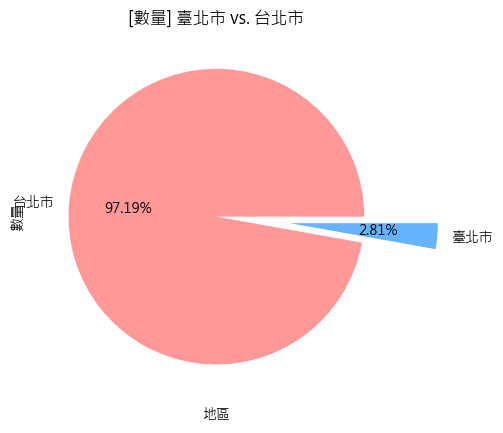

In [18]:
'''畫個圖吧'''
plt.pie(
    df.value_counts('note').values, 
    explode=(0, 0.5),
    labels=df.value_counts('note').index,
    colors=['#ff9999', '#66b3ff'],
    autopct="%.2f%%"
)
plt.title("[數量] 臺北市 vs. 台北市")
plt.xlabel("地區")
plt.ylabel("數量")
plt.show()